Random Forest R2 degeri
0.9475498704400864
Decision Tree R2 degeri
1.0
SVR R2 degeri
-0.6727532121999638
Linear R2 degeri
0.5857207050854021
Polynomial R2 degeri
0.9990003560225861


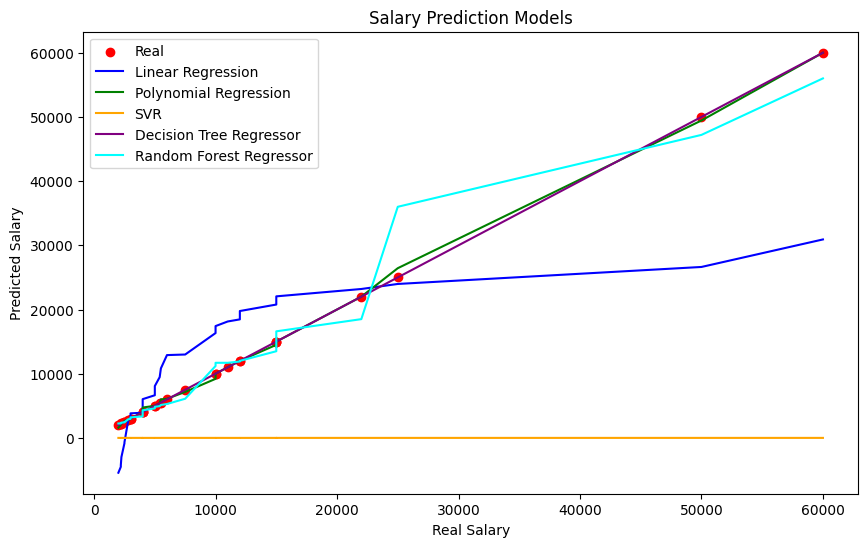

In [36]:

# -*- coding: utf-8 -*-
"""
Created on Mon Jul  6 18:50:13 2020

@author: sadievrenseker


"""

#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import statsmodels.api as sm


veriler = pd.read_csv('maaslar.csv')
x = veriler.iloc[:,2:5]
y = veriler.iloc[:,5:]
X = x.values
Y = y.values

#linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)




#polynomial regression

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)


#tahminler


#verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()
x_olcekli = sc1.fit_transform(X)
sc2=StandardScaler()
y_olcekli = np.ravel(sc2.fit_transform(Y.reshape(-1,1)))
from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_olcekli,y_olcekli)




#Decision Tree Regresyon
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)


#Random Forest Regresyonu
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y.ravel())




print('Random Forest R2 degeri')
print(r2_score(Y, rf_reg.predict(X)))
print('Decision Tree R2 degeri')
print(r2_score(Y, r_dt.predict(X)))
print('SVR R2 degeri')
print(r2_score(Y, svr_reg.predict(x_olcekli)))
print('Linear R2 degeri')
print(r2_score(Y, lin_reg.predict(X)))
print('Polynomial R2 degeri')
print(r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X))))
# Plotting the results
# Sorting values for better visualization
Y_sorted = np.sort(Y, axis=0)

# Plotting the results
plt.figure(figsize=(10, 6))

# Real values
plt.scatter(Y_sorted, Y_sorted, color='red', label='Real')

# Linear Regression
plt.plot(Y_sorted, np.sort(lin_reg.predict(X), axis=0), color='blue', label='Linear Regression')

# Polynomial Regression
plt.plot(Y_sorted, np.sort(lin_reg2.predict(poly_reg.fit_transform(X)), axis=0), color='green', label='Polynomial Regression')

# SVR
plt.plot(Y_sorted, svr_reg.predict(x_olcekli), color='orange', label='SVR')

# Decision Tree Regressor
plt.plot(Y_sorted, np.sort(r_dt.predict(X), axis=0), color='purple', label='Decision Tree Regressor')

# Random Forest Regressor
plt.plot(Y_sorted, np.sort(rf_reg.predict(X), axis=0), color='cyan', label='Random Forest Regressor')

plt.title('Salary Prediction Models')
plt.xlabel('Real Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.show()
